# Importing the Libraries
First we import the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

# Reading the Data

In [2]:
df = pd.read_csv('/kaggle/input/dummy-advertising-and-sales-data/Dummy Data HSS.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


We want to look if there's any missing data, as follows:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

We can see there are mising data in several columns. Thus, we want to fill the missing data with its average, as follows:

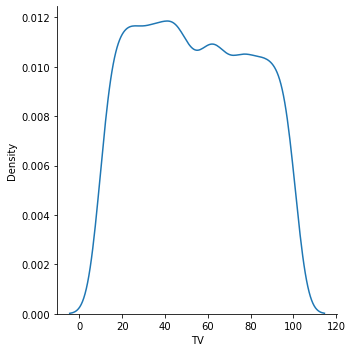

In [6]:
import seaborn as sns
sns.displot(df['TV'], kind='kde')

Num of missing valuse = 0


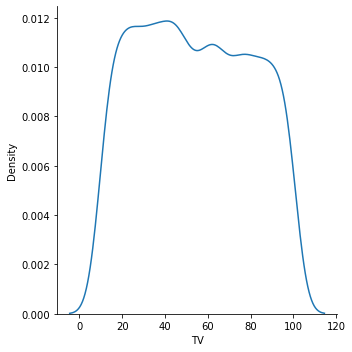

In [13]:
TV_mody1=df['TV'].fillna(method='ffill')
sns.displot(TV_mody1, kind='kde')
print("Num of missing valuse =",TV_mody1.isnull().sum())

Seems good way to fill, so we will fill the original columns

In [16]:
df['TV']=df['TV'].fillna(method='ffill')
df['Social Media']=df['Social Media'].fillna(method='ffill')
df['Radio']= df['Radio'].fillna(method='ffill')

In [17]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           6
dtype: int64

In [18]:
df = df.fillna(df.mean()) # updates the df
# see the updated df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


Now we have a dataframe that has no missing values. Now, we want to encode the categorical variable to dummy variables, as follows:

In [19]:
df = pd.get_dummies(df) # updates the df again
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


Now for the purpose of simplicity, we shift the column 'Sales' to the end of the table, as follows:

In [20]:
df.columns # getting the column names

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [21]:
df = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Sales']]
df.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
0,16.0,6.566231,2.907983,0,1,0,0,54.732757
1,13.0,9.237765,2.409567,0,1,0,0,46.677897
2,41.0,15.886446,2.913410,0,1,0,0,150.177829
3,83.0,30.020028,6.922304,0,1,0,0,298.246340
4,15.0,8.437408,1.405998,0,0,1,0,56.594181


Out of curiosity, we just want to explore whether there is any correlation of Sales with its predictors:

In [22]:
df.corr()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
TV,1.000000,0.863700,0.525323,0.021714,-0.013218,-0.004708,-0.003587,0.994890
Radio,0.863700,1.000000,0.606195,0.010247,-0.004802,0.003478,-0.008860,0.866058
Social Media,0.525323,0.606195,1.000000,0.011244,0.013504,-0.013809,-0.010901,0.528114
Influencer_Macro,0.021714,0.010247,0.011244,1.000000,-0.332131,-0.331171,-0.328482,0.019267
Influencer_Mega,-0.013218,-0.004802,0.013504,-0.332131,1.000000,-0.338211,-0.335465,-0.011701
Influencer_Micro,-0.004708,0.003478,-0.013809,-0.331171,-0.338211,1.000000,-0.334495,-0.004099
Influencer_Nano,-0.003587,-0.008860,-0.010901,-0.328482,-0.335465,-0.334495,1.000000,-0.003289
Sales,0.994890,0.866058,0.528114,0.019267,-0.011701,-0.004099,-0.003289,1.000000


Now we have a clean data. Now, we will create the independent and dependent variables (x and y), as follows:

In [23]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1:].values

Let's see some preview of x and y:

In [24]:
print(x)
print(y)

[[16.          6.56623079  2.90798277 ...  1.          0.
   0.        ]
 [13.          9.23776457  2.4095672  ...  1.          0.
   0.        ]
 [41.         15.88644602  2.91341018 ...  1.          0.
   0.        ]
 ...
 [44.         19.80007236  5.09619187 ...  0.          1.
   0.        ]
 [71.         17.5346403   1.94087322 ...  0.          0.
   0.        ]
 [42.         15.96668752  5.04654763 ...  0.          1.
   0.        ]]
[[ 54.73275715]
 [ 46.67789698]
 [150.1778288 ]
 ...
 [163.6314574 ]
 [253.6104113 ]
 [148.2024141 ]]


Looks good. Now, let's split our data for training and testing:

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

Let's see some previews:

In [26]:
print(x_train)
print(y_train)

[[34.         17.36318028  4.1989204  ...  0.          0.
   0.        ]
 [17.          7.00281381  0.23665544 ...  0.          1.
   0.        ]
 [35.          7.1987786   1.50952132 ...  0.          0.
   1.        ]
 ...
 [62.         23.86330204  4.20856435 ...  0.          1.
   0.        ]
 [44.         12.79549978  1.22833795 ...  1.          0.
   0.        ]
 [19.          0.19457648  1.23567458 ...  1.          0.
   0.        ]]
[[118.859904  ]
 [ 64.24894393]
 [128.7372869 ]
 ...
 [221.4837689 ]
 [156.070975  ]
 [ 64.57192004]]


We want to know the number of data used for training and testing, as follows:

In [27]:
print(len(x_train),len(x_test))

3429 1143


# Analysis

Now we will train and predict the data based on several regression models:
* Linear
* Random Forest
* Decision Tree
* Support Vector
* Polynomial

For each regression model, we will evaluate its r2_score and root mean squared error (RMSE). The higher r2_score the better; the lower RMSE, the better.

## Linear Regression

In [28]:
lr_regressor = LinearRegression() # instantiate the Linear Regression module
lr_regressor.fit(x_train, y_train) # training the data

# after training the data, perform prediction:

y_pred_lr = lr_regressor.predict(x_test) # this is the prediction 

# evaluate the r2_score and RMSE between prediction and real data

print(r2_score(y_test, y_pred_lr))
print(mse(y_test, y_pred_lr)**0.5)

0.9983589945625105
3.780943208749109


In [29]:
print(lr_regressor.coef_, lr_regressor.intercept_)

[[ 3.42849088  0.32463707  0.11998125 -0.47471726  0.21000253  0.21295139
   0.05176334]] [0.81675045]


In [38]:
print("train acc :",lr_regressor.score(x_train,y_train))
print("test acc :",lr_regressor.score(x_test,y_test))

train acc : 0.9871471462613536
test acc : 0.9983589945625105


## Random Forest Regression

In [34]:
rf_regressor = RandomForestRegressor() # instantiate the Random Forest Regression module
rf_regressor.fit(x_train, y_train) # training the data

# after training the data, perform prediction:

y_pred_rf = rf_regressor.predict(x_test) # prediction data

# evaluate the r2_score and RMSE between prediction and real data

print(r2_score(y_test, y_pred_rf))
print(mse(y_test, y_pred_rf)**0.5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9963394188673292
5.64703087923543


In [39]:
print("train acc :",rf_regressor.score(x_train,y_train))
print("test acc :",rf_regressor.score(x_test,y_test))

train acc : 0.9978190951279572
test acc : 0.9963394188673292


## Decision Tree Regression

In [36]:
# Similar processes with the above two examples

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

y_pred_dt = dt_regressor.predict(x_test)

print(r2_score(y_test, y_pred_dt))
print(mse(y_test, y_pred_dt)**0.5)

0.985340274684895
11.300770637957317


In [40]:
print("train acc :",dt_regressor.score(x_train,y_train))
print("test acc :",dt_regressor.score(x_test,y_test))

train acc : 1.0
test acc : 0.985340274684895


**The best one is : Random Forest Regressor**